# Example 1: Basic Simulation and Recovery of SCD with NPTFit

In this example we cover how to run a point source Monte Carlo simulation for a user defined template and source-count distribution (SCD) with NPTFit-Sim. In this example we use a uniform template to produce a simulated counts map. The counts map is then run through NPTFit to recover the injected SCD.

The relevant modules are imported.

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../NPTFit-Sim/')
import ps_mc
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt

## Define Source Count Distribution & Load Templates

Begin by defining the source count distribution. Here we use a SCD with one break.

It is important to remember that input parameters of the SCD are defined from high to low flux (or counts). This means, for example, in a model with a single broken power law the index that corresponds to higher flux should be listed as the first value in your array.

In [2]:
n = np.array([15.00,-1.0]) # indexes for SCD
S = np.array([10.00]) # SCD break, here in terms of counts
A = -1.00 # log-normilization
name = "simulation" # Name of output file

Create a basic template and exposure map.

Here we use a low nside for uniform exposure and template maps.

In [3]:
nside = 16
npix = hp.nside2npix(nside)

temp = 0.1 * np.ones(npix).astype(float)
EXP = np.ones(npix).astype(float)

The SCD as described above is in terms of counts. NPTFit-Sim uses source count distributions that are defined in terms of flux, i.e. dN/dF as opposed to dN/dS. The two distributions are related by the exposure as follows:

$$\frac{dN_{p}}{dS}(S;\theta) = \frac{1}{E_{p}} \frac{dN_{p}}{dF}(F = S/E_{p};\theta)$$

To correct for this effect, the mean exposure is calculated from the exposure map and divided through the count break, $S$, to form a flux break. Additionally, the normilization, $A$, is multiplied by the mean exposure to transform the SCD in terms of counts to flux. Note, we can just add the logarithm of the mean exposure to the log-normalization.

In [4]:
# Calculate the mean exposure
mean_exp = np.mean(EXP)
                   
# Calculate flux break from counts break and mean exposure
F = S / mean_exp
                   
# Cornvert log-normilization term, A, into terms of flux
A = A + np.log10(mean_exp)

## User Defined PSF

Prior to running the simulation, the user must define a PSF using a lambda function. For this simple case we will only consider a Gaussian.

Your PSF must be a defined in terms of radians.

In [5]:
# Define parameters that specify the PSF
sigma = 2.00 * np.pi/180.

# Lambda function to pass user defined PSF
psf_r = lambda r: np.exp(-r**2. / (2.*sigma**2.))

## Define Energy Dependence

Ebins are the bin edges.
Simple Power law for demonstration, but any arbitrary function can be used

In [6]:
Ebins = np.array([0.1,0.2,0.3,0.5,0.8,1.5,10])
Edep  = lambda E,Eparam: E**Eparam[0]
Eparam = np.array([-2.2])

## Run NPTFit-Sim

The simulation can be started by calling on the run function from the ps_mc module that was imported earlier. It depends on the parameters of the SCD, the exposure and template maps, and the PSF. It also gives the user the option to save their map to a .npy file with the name of their choice. Simulations with ~ 1000 sources will take no more than a few seconds to run.

In [7]:
sim_maps = ps_mc.run(n,F,A,temp,EXP,psf_r,Ebins,Edep,Eparam,name="map",save=False)

Number of sources from Poisson draw: 176
Sampling the source count distribution.
Simulating counts map ...
Done simulation.


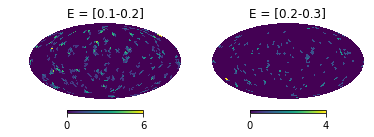

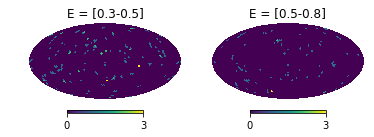

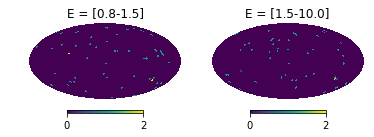

In [8]:
#View the output on a HEALPix maps
for i in [0,2,4]:
    fig1, (ax1, ax2) = plt.subplots(ncols=2)
    plt.axes(ax1)
    hp.mollview(sim_maps[0+i],title="E = ["+str(Ebins[0+i])+"-"+str(Ebins[1+i])+"]", hold=True)
    plt.axes(ax2)
    hp.mollview(sim_maps[1+i],title="E = ["+str(Ebins[1+i])+"-"+str(Ebins[2+i])+"]", hold=True)

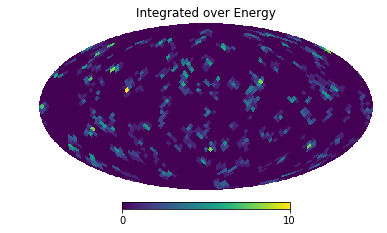

In [9]:
sum_map = np.copy(sim_maps[0])
for i in [1, 2, 3, 4, 5]:
    sum_map += sim_maps[i]
    
hp.mollview(sum_map,title="Integrated over Energy", hold=True)    